In [1]:
import pandas as pd

In [2]:
import json

**Tu choisis ton json**

In [3]:
with open('C:\\Users\\marwane\\Documents\\Data Science\\events_19769.json',encoding="utf-8") as data:
    events = json.load(data)

In [4]:
import pprint

**Fonction d'extraction des shots on target**

In [5]:
def shots_on_target(file):
    #isolate the shots events
    shots = []
    for i,val in enumerate(file):
        if file[i]['type']['name'] == 'Shot':
            shots.append(events[i])
            
    #Retrieve the shots on target
    c = 0
    shots_on_T = []
    for i,val in enumerate(shots):
        if (shots[i]['shot']['outcome']['name'] != 'Off T') and (shots[i]['shot']['outcome']['name'] != "Saved Off T") and (shots[i]['shot']['outcome']['name'] != "Wayward"):
            shots_on_T.append(shots[i])
            c = c + 1
                
    return shots_on_T

**Rassembler tous les events avec Shot on Target**

In [6]:
sot = shots_on_target(events)

In [7]:
len(sot)

15

In [15]:
dfs = []


for i,val in enumerate(sot):
    # Reinitialisation après un loop de i
    indexes = []
    x = []
    y = []
    player = []
    position = []
    teammate = []
    #df = pd.Dataframe()
    
    #print('\n index : ',sot[i]['index']," | len : ",len(sot[i]['shot']['freeze_frame']),'\n')
    
    
    for j,val2 in enumerate(sot[i]['shot']['freeze_frame']):
        
        indexes.append(sot[i]['index'])
        #print("X : ",sot[i]['shot']['freeze_frame'][j]['location'][0])
        x.append(sot[i]['shot']['freeze_frame'][j]['location'][0])
        
        #print("Y : ",sot[i]['shot']['freeze_frame'][j]['location'][1])
        y.append(sot[i]['shot']['freeze_frame'][j]['location'][1])
        
        #print(sot[i]['shot']['freeze_frame'][j]['player']['name'])
        player.append(sot[i]['shot']['freeze_frame'][j]['player']['name'])
        
        #print(sot[i]['shot']['freeze_frame'][j]['position']['name'])
        position.append(sot[i]['shot']['freeze_frame'][j]['position']['name'])
        
        #print(sot[i]['shot']['freeze_frame'][j]['teammate'])
        teammate.append(sot[i]['shot']['freeze_frame'][j]['teammate'])
        
    df = pd.DataFrame({'Index':indexes,'X':x,'Y':y,'Player':player,'Position':position,'team mate':teammate})
    dfs.append(df)
    
    

**Parcourir une liste de 15 Dataframes et afficher la longueur de chaque df**

In [16]:
for i in dfs:
    print(len(i))

17
7
16
10
9
16
12
17
13
8
7
9
5
6
10


In [18]:
dfs[3]

,Index,X,Y,Player,Position,team mate
0,1077,110.0,44.0,Iniabasi Anefiok Umotong,Center Forward,True
1,1077,107.0,41.0,Aileen Whelan,Left Wing,True
2,1077,106.0,43.0,Ellie Brazil,Right Wing,True
3,1077,108.0,46.0,Esmee de Graaf,Left Wing,False
4,1077,105.0,35.0,Julia Simic,Right Center Midfield,False
5,1077,105.0,38.0,Kate Longhurst,Right Back,False
6,1077,105.0,48.0,Brianna Visalli,Left Center Midfield,False
7,1077,113.0,38.0,Gilly Louise Scarlett Flaherty,Right Center Back,False
8,1077,120.0,41.0,Anne Moorhouse,Goalkeeper,False
9,1077,110.0,42.0,Brooke Hendrix,Left Center Back,False


### Visualizing the players position

In [66]:
import numpy as np
import matplotlib.pyplot as plt
from mplsoccer import Pitch
import seaborn as sns
%matplotlib inline

In [67]:
plt.rcParams['figure.figsize'] = [20, 10]


In [70]:
dfs[0]['X']

0     118.0
1     113.0
2     108.0
3     115.0
4     116.0
5     120.0
6     116.0
7     119.0
8     119.0
9     117.0
10     93.0
11    106.0
12    115.0
13    117.0
14    115.0
15    118.0
16    115.0
Name: X, dtype: float64

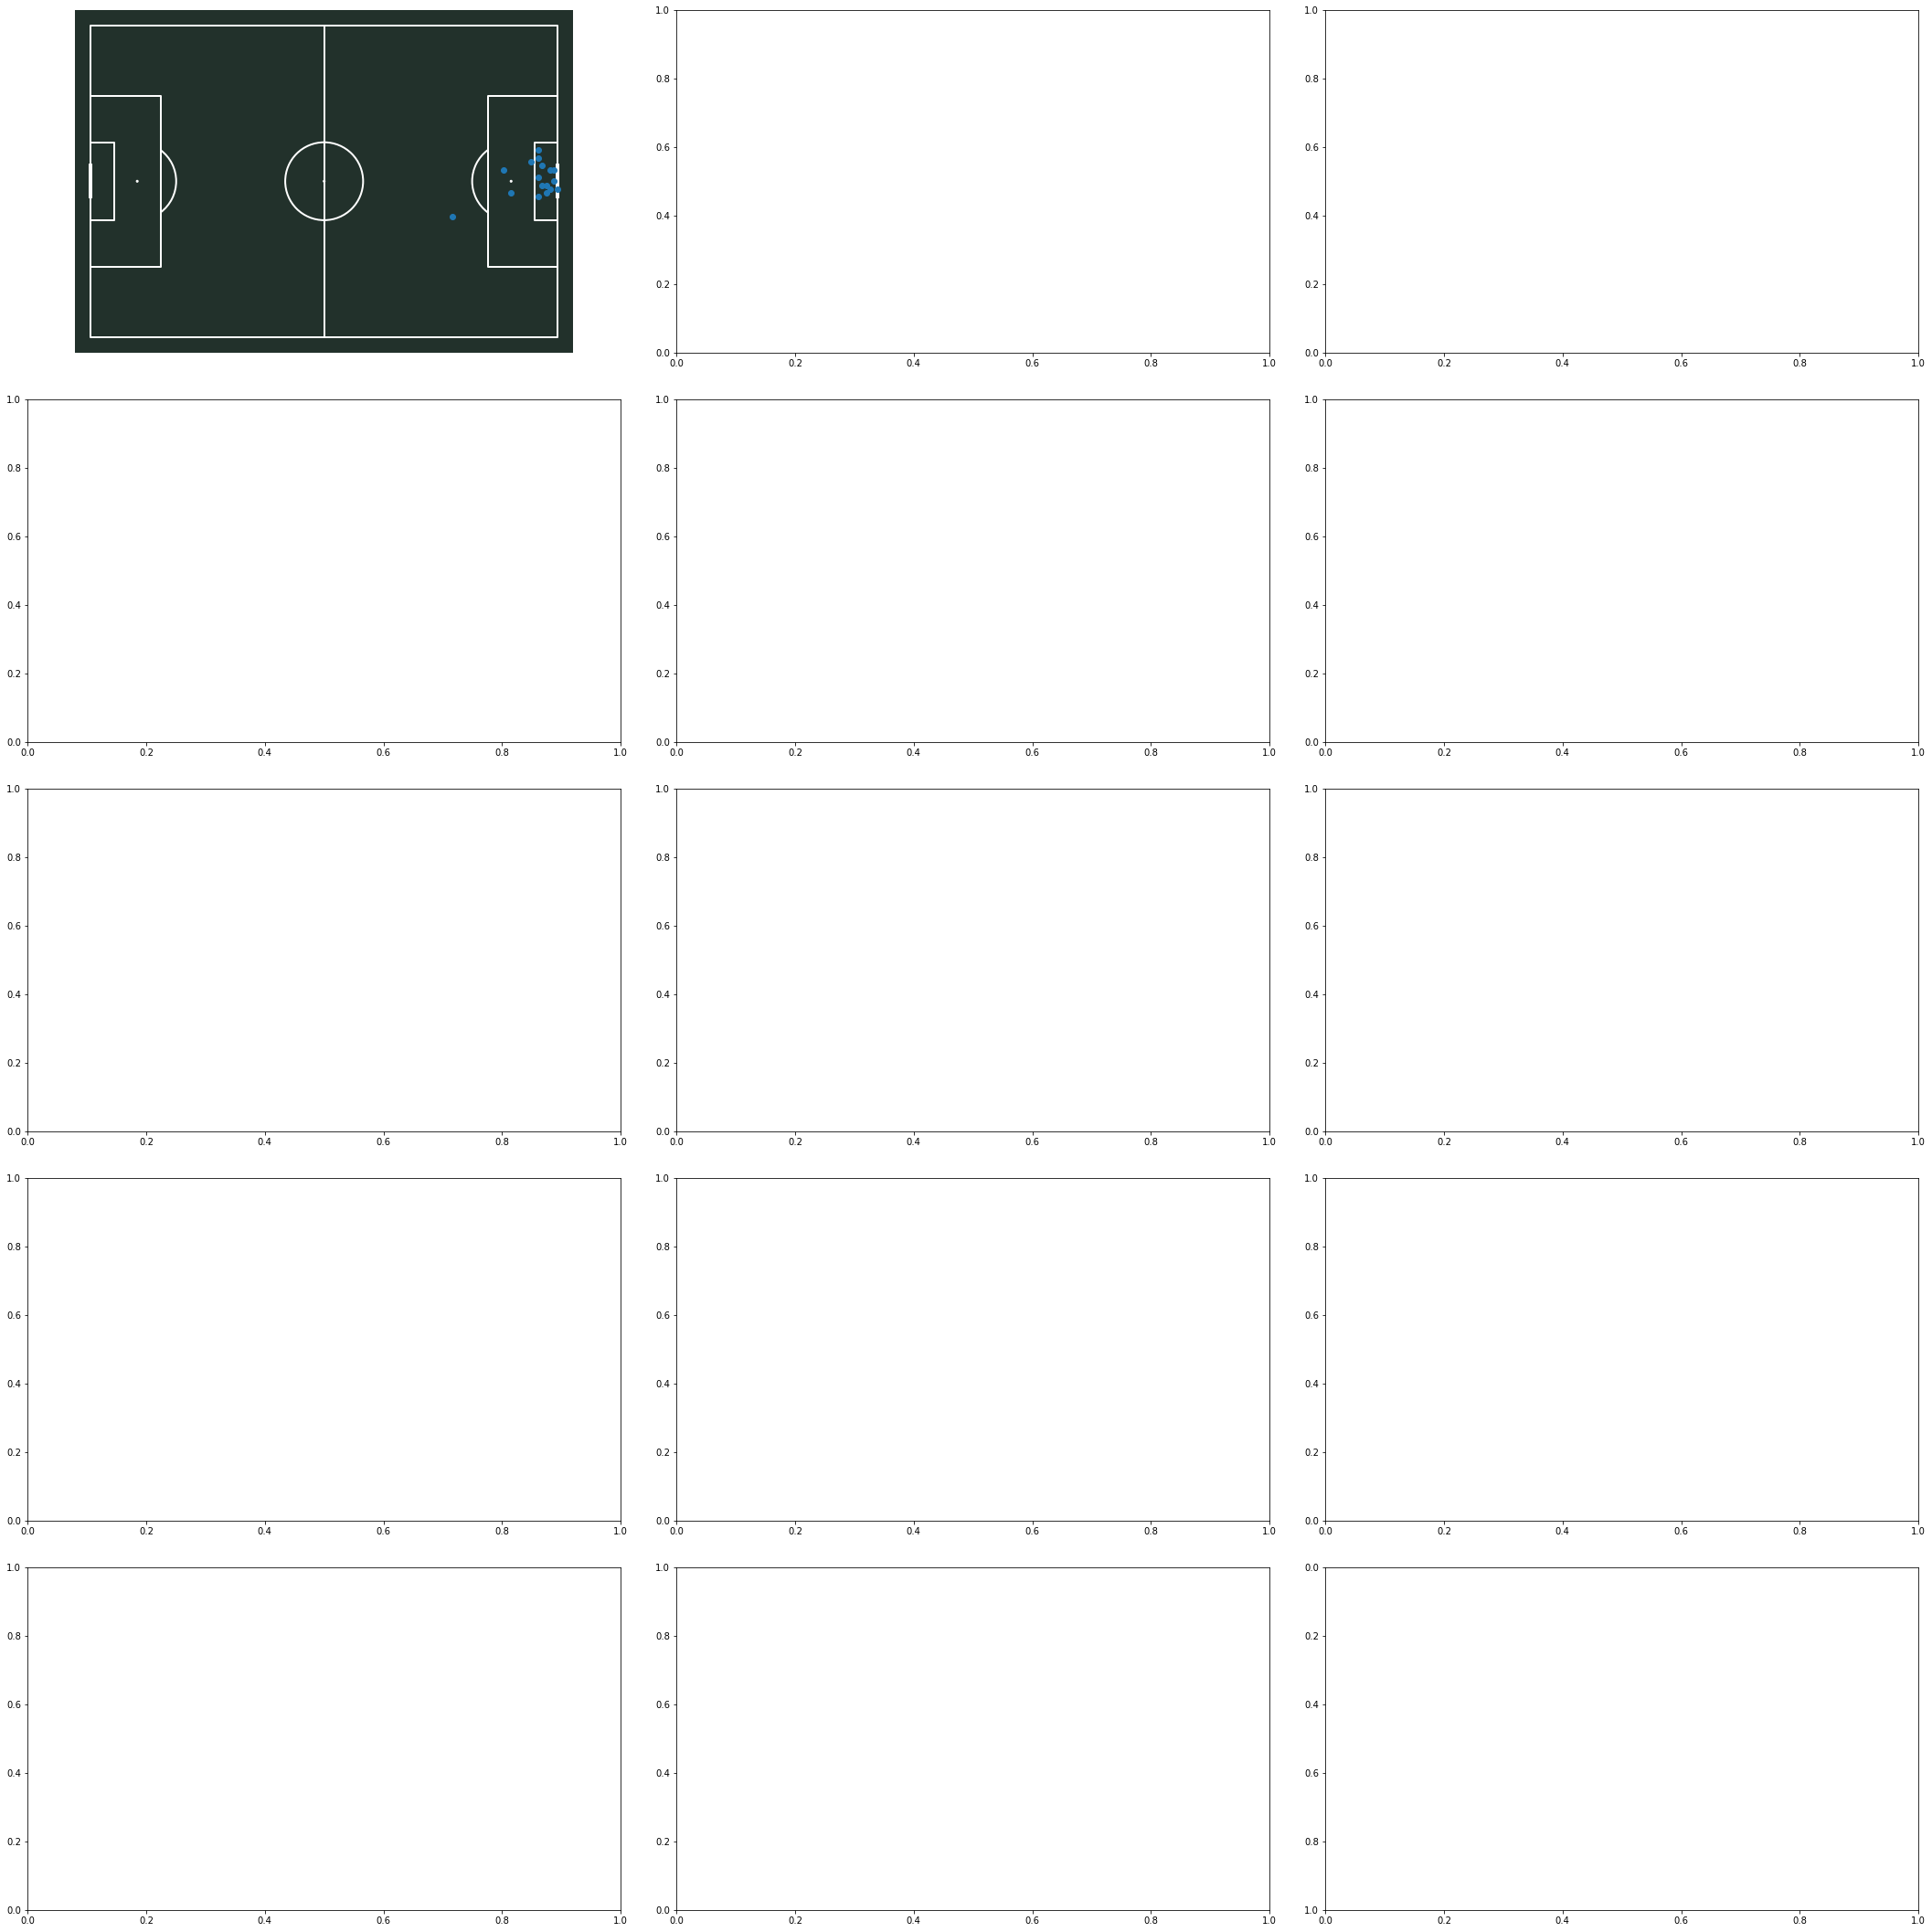

In [86]:
pitch = Pitch(pitch_type='statsbomb',pitch_color='#22312b',line_color='white',stripe=False)
#fig = plt.figure(figsize=(30, 30))

x = np.linspace(0, 2 * np.pi, 400)
y = np.sin(x ** 2)

fig, axs = plt.subplots(figsize=(30,30),nrows=5, ncols=3)

fig.tight_layout(pad=3.0)
plt.gca().invert_yaxis()

axs[0,0].scatter(dfs[0]['X'],dfs[0]['Y'])
pitch.draw(ax=axs[0,0])


